In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/mydata.csv'
data = pd.read_csv(file_path)

print(data.head())
print(data.info())

        0       1       2       3       4       5       6       7       8  \
0  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0317  0.0732  0.0024   
1  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0366  0.0757  0.0024   
2  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0415  0.0879  0.0024   
3  0.0024  0.0024  0.0049  0.0024  0.0024  0.0024  0.0366  0.0952  0.0024   
4  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0293  0.0952  0.0024   

        9  ...    17     18     19     20     21  0.3  0.4  0.5  0.6  0.7  
0  0.0903  ...  76.0  137.0  139.0  134.0  108.0  1.0  3.0    0    0    0  
1  0.0928  ...  76.0  137.0  139.0  134.0  108.0  NaN  NaN    0    0    0  
2  0.0903  ...  76.0  137.0  139.0  134.0  108.0  NaN  NaN    0    0    0  
3  0.0830  ...  76.0  137.0  139.0  134.0  108.0  NaN  NaN    0    0    0  
4  0.0708  ...  76.0  137.0  139.0  134.0  108.0  NaN  NaN    0    0    0  

[5 rows x 38 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256048 

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/mydata.csv'  # Adjust this path to your file's actual location
data = pd.read_csv(file_path)

data_cleaned = data.dropna()
print("\nFirst few rows of the cleaned dataset:")
print(data_cleaned.head())

print("\nCleaned dataset information:")
print(data_cleaned.info())



First few rows of the cleaned dataset:
             0       1       2       3       4       5       6       7  \
0       0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0317  0.0732   
227493  3.0000  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0146   
370175  3.0000  0.0146  0.0024  0.0024  0.0024  0.0049  0.2026  0.3589   
594550  4.0000  0.0024  0.0024  0.0024  0.0024  0.0024  0.1465  0.0439   
695385  4.0000  0.0024  0.0024  0.0024  0.0024  0.0024  0.2832  0.1294   

             8       9  ...    17     18          19     20         21  \
0       0.0024  0.0903  ...  76.0  137.0  139.000000  134.0  108.00000   
227493  0.0024  0.0024  ...  78.0  151.0  154.382077  145.0  119.00000   
370175  0.0024  0.3027  ...  84.0  149.0  151.458723  142.0  123.94266   
594550  0.0024  0.0146  ...  79.0  135.0  111.000000  139.0  119.00000   
695385  0.0024  0.0024  ...  73.0  136.0  103.449323  136.0  115.00000   

           0.3        0.4  0.5  0.6  0.7  
0       1.0000    3.00000  

First few rows of the dataset:
        0       1       2       3       4       5       6       7       8  \
0  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0317  0.0732  0.0024   
1  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0366  0.0757  0.0024   
2  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0415  0.0879  0.0024   
3  0.0024  0.0024  0.0049  0.0024  0.0024  0.0024  0.0366  0.0952  0.0024   
4  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0293  0.0952  0.0024   

        9  ...    17     18     19     20     21  0.3  0.4  0.5  0.6  0.7  
0  0.0903  ...  76.0  137.0  139.0  134.0  108.0  1.0  3.0    0    0    0  
1  0.0928  ...  76.0  137.0  139.0  134.0  108.0  NaN  NaN    0    0    0  
2  0.0903  ...  76.0  137.0  139.0  134.0  108.0  NaN  NaN    0    0    0  
3  0.0830  ...  76.0  137.0  139.0  134.0  108.0  NaN  NaN    0    0    0  
4  0.0708  ...  76.0  137.0  139.0  134.0  108.0  NaN  NaN    0    0    0  

[5 rows x 38 columns]

Dataset information:
<clas

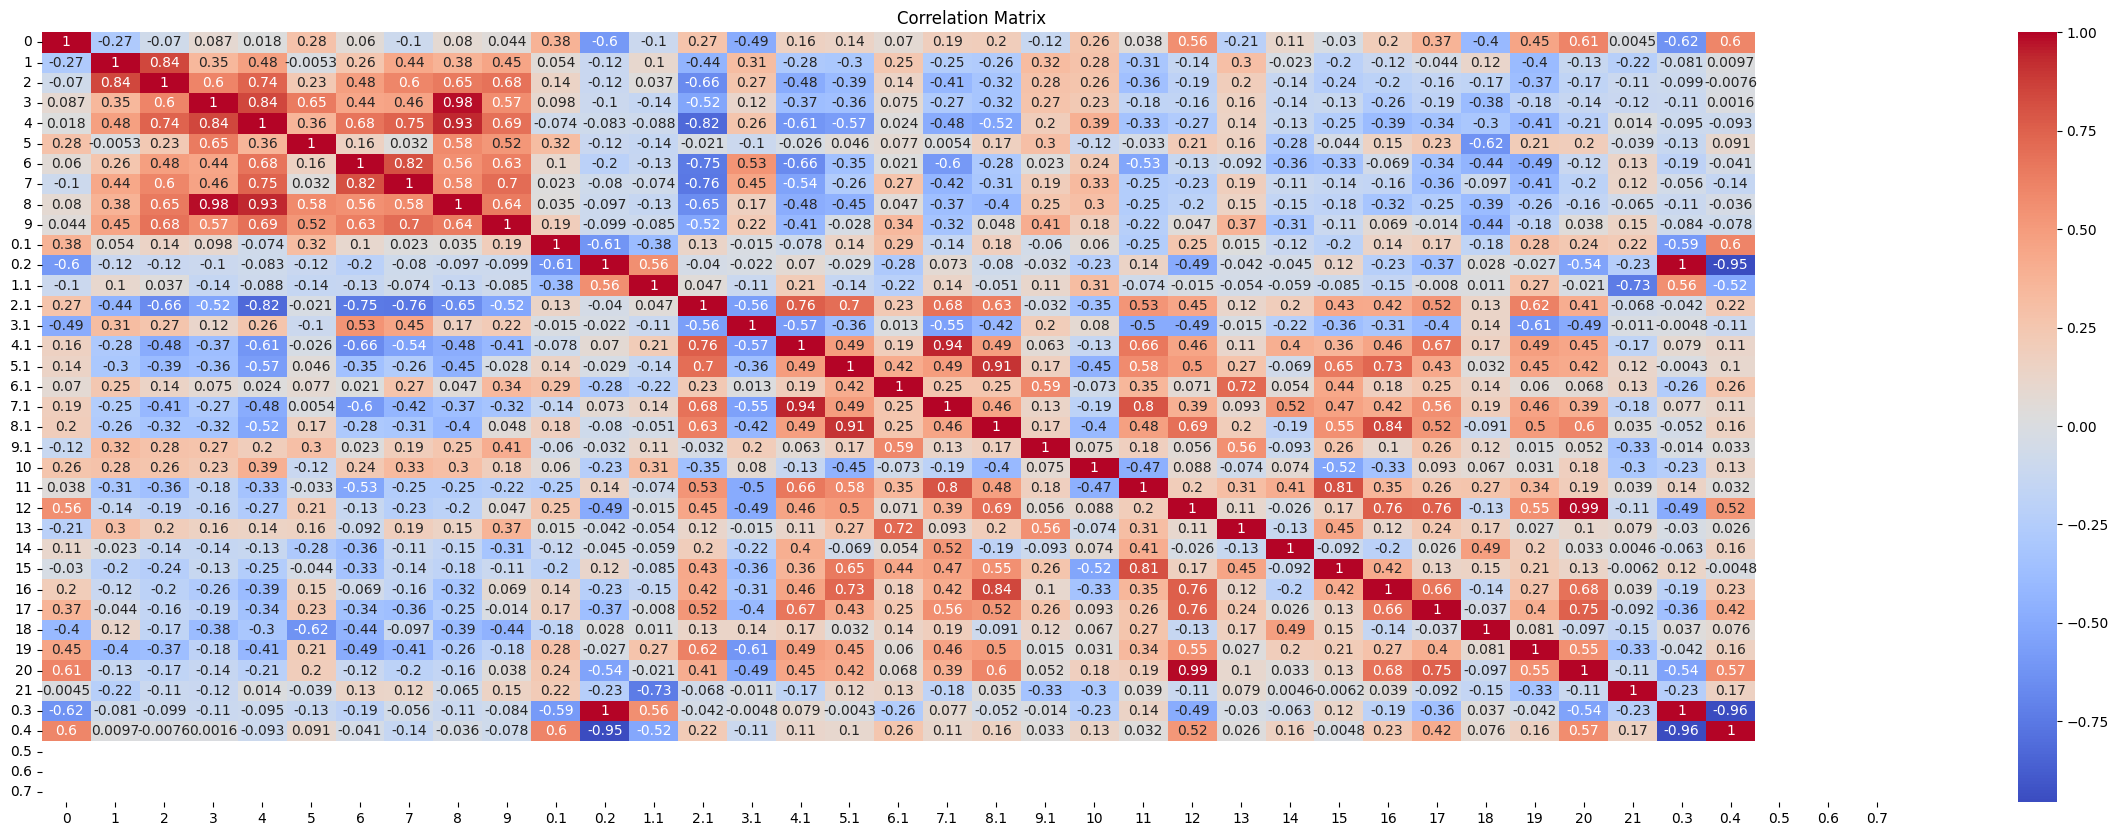


Data preprocessing and EDA completed.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '/content/drive/MyDrive/mydata.csv'  # Adjust this path to your file's actual location
data = pd.read_csv(file_path)


print("First few rows of the dataset:")
print(data.head())


print("\nDataset information:")
print(data.info())

# Preprocess the data by removing all NaN values
data_cleaned = data.dropna()


print("\nFirst few rows of the cleaned dataset:")
print(data_cleaned.head())

print("\nCleaned dataset information:")
print(data_cleaned.info())


data_cleaned = data_cleaned.drop_duplicates()
print(f"\nNumber of rows after removing duplicates: {len(data_cleaned)}")


if 'Category' in data_cleaned.columns:
    label_encoder = LabelEncoder()
    data_cleaned['Category'] = label_encoder.fit_transform(data_cleaned['Category'])
    print("\nCategorical columns encoded.")


numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])
print("\nNumerical columns normalized or scaled.")

plt.figure(figsize=(30, 10))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

sns.pairplot(data_cleaned)
plt.show()

print("\nData preprocessing and EDA completed.")


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = '/content/drive/MyDrive/mydata.csv'  # Adjust this path to your file's actual location
data = pd.read_csv(file_path)


data_cleaned = data.dropna()
data_cleaned = data_cleaned.drop_duplicates()

if 'Category' in data_cleaned.columns:
    label_encoder = LabelEncoder()
    data_cleaned['Category'] = label_encoder.fit_transform(data_cleaned['Category'])

numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

target_column = '0.7'


X = data_cleaned.drop(columns=[target_column])
y = data_cleaned[target_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


model = Sequential()

# Input layer
model.add(Dense(units=256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))


model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model Test Accuracy: {accuracy}")


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.7567 - accuracy: 0.3529 - val_loss: 0.5491 - val_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 84ms/step - loss: 0.5636 - accuracy: 0.7647 - val_loss: 0.4589 - val_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 67ms/step - loss: 0.5516 - accuracy: 0.7647 - val_loss: 0.3905 - val_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 67ms/step - loss: 0.3594 - accuracy: 1.0000 - val_loss: 0.3337 - val_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 79ms/step - loss: 0.3088 - accuracy: 1.0000 - val_loss: 0.2841 - val_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 56ms/step - loss: 0.2432 - accuracy: 1.0000 - val_loss: 0.2391 - val_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 71ms/step - loss: 0.1774 - accuracy: 1.0000 - val_loss: 0.1977 - val_accuracy: 1.0000
Epoch 8/100
1/1 [=====

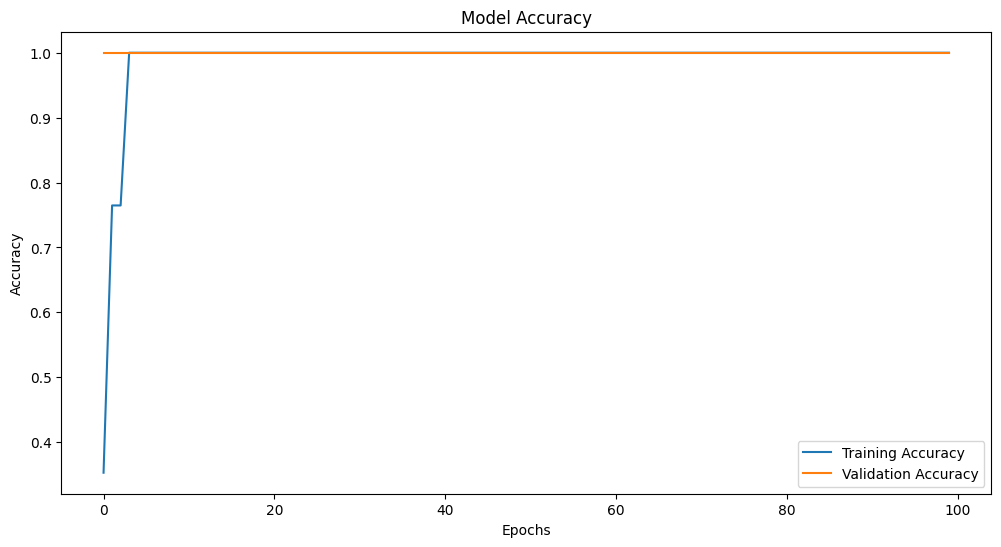

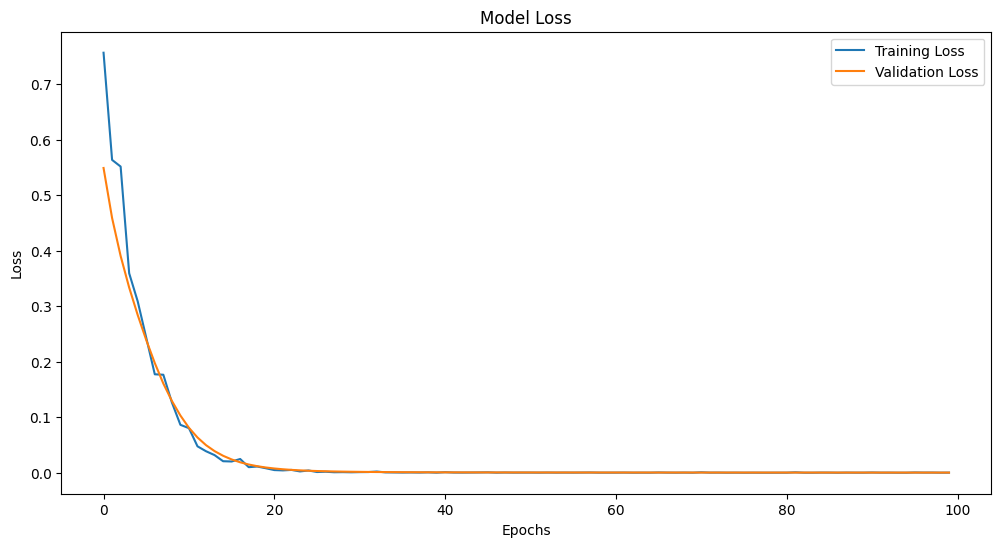


Trained model saved to /content/drive/MyDrive/trained_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

# Plot the training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the trained model for future use
model_file_path = '/content/drive/MyDrive/trained_model.h5'
model.save(model_file_path)
print(f"\nTrained model saved to {model_file_path}")